In [1]:
import matplotlib as plt
import seaborn as sns 
import pandas as pd
import sweetviz as sv

# Import Data

In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Explore Data

In [3]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)

Report analyze.html was generated.


In [12]:
## The dataset is clean, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:>

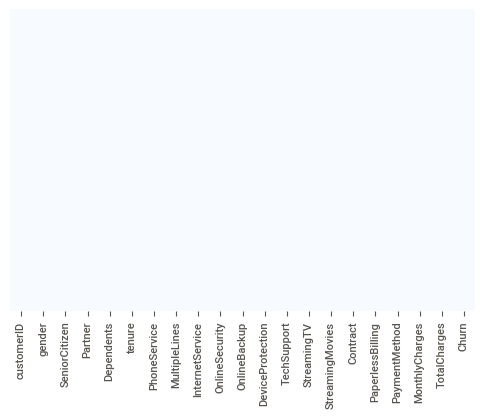

In [60]:
## verifiying Nulls
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Categorical Variables

In [56]:
nulls={}
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for column in columns:
    nulls[column]=df[column].unique()
    #print(column, df[column].unique())

In [54]:
nulls_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in nulls.items() ]))

In [55]:
nulls_df.T

,0,1,2,3
gender,Female,Male,NaN,NaN
SeniorCitizen,0.0,1.0,NaN,NaN
Partner,Yes,No,NaN,NaN
Dependents,No,Yes,NaN,NaN
PhoneService,No,Yes,NaN,NaN
MultipleLines,No phone service,No,Yes,NaN
InternetService,DSL,Fiber optic,No,NaN
OnlineSecurity,No,Yes,No internet service,NaN
OnlineBackup,Yes,No,No internet service,NaN
DeviceProtection,No,Yes,No internet service,NaN


## Numerical Variables

In [58]:
## TotalCharges Column was recognized as object but it is a float64 type, it must be transformed to identify the reason of the object type assumed by pandas

df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')

ValueError: could not convert string to float: ''

In [62]:
## TotalCharges COlumn contains values ' ' which are not numerical, this could be explained because these clients has a tenure of 0, 
# so they could be new clients who haven't paid yet any bill. For that reason, we will impute this values with 0.

df[df['TotalCharges'] == ' '][['customerID', 'SeniorCitizen', 
       'tenure', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,customerID,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,0,0,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,0,0,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,0,0,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,0,0,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,0,0,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,0,0,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,0,0,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,0,0,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,0,0,Two year,No,Mailed check,73.35,,No


In [70]:
df['TotalCharges'] = df.apply(lambda a : 0 if (a['TotalCharges'] == ' ') else a['TotalCharges'], axis=1)

In [72]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [74]:
## Transform column TotalCharges after imputing to verify that there are not more non numerical values
df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')

In [75]:
## COlumn TotalCharges was succesfully transformed to Float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


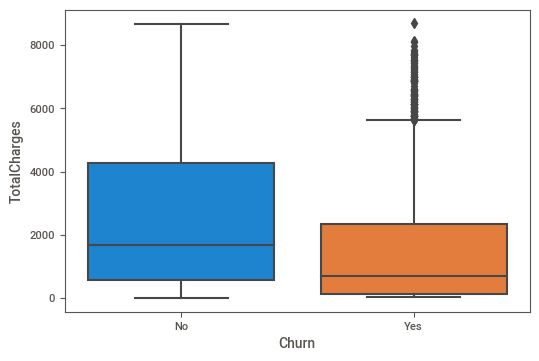

In [78]:
#sns.boxplot(df[['TotalCharges', 'MonthlyCharges', 'tenure']])
ax = sns.boxplot(x="Churn", y="TotalCharges", data=df)

<AxesSubplot:>

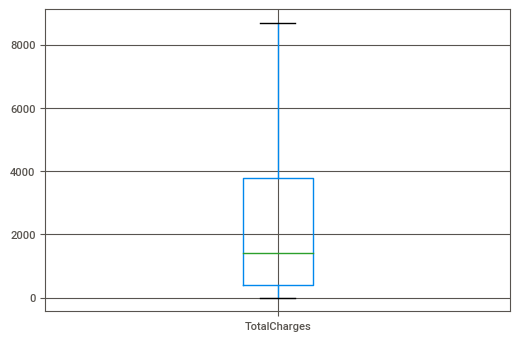

In [83]:
df.boxplot(column=['TotalCharges'])

<AxesSubplot:>

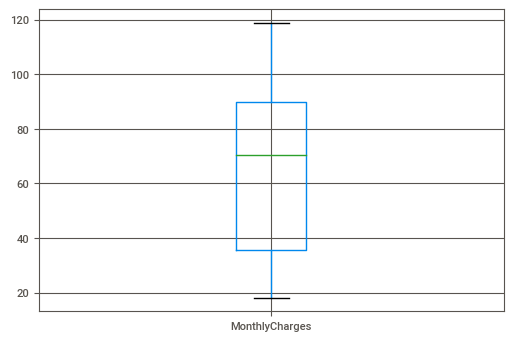

In [81]:
df.boxplot(column=['MonthlyCharges'])

<AxesSubplot:>

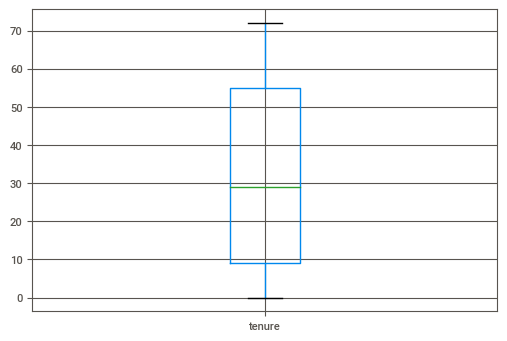

In [82]:
df.boxplot(column=['tenure'])